In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
base_url = 'https://api.motogp.pulselive.com/motogp/v1/results/'
# 2024 season id = dd12382e-1d9f-46ee-a5f7-c5104db28e43
# 2024 category_id_motogp = e8c110ad-64aa-4e8e-8a86-f2f152f6a942
categories_ep = 'categories?seasonUuid=dd12382e-1d9f-46ee-a5f7-c5104db28e43'
standings_ep = 'standings?seasonUuid=dd12382e-1d9f-46ee-a5f7-c5104db28e43&categoryUuid=e8c110ad-64aa-4e8e-8a86-f2f152f6a942'

In [3]:
response = requests.get(base_url + standings_ep)

In [4]:
# Check the status of the response
if response.status_code == 200:
    print("Successfully retrieved data")
    data = response.json()  # Convert the response to JSON format
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")

Successfully retrieved data


In [5]:
data = response.json()  # Convert the response to JSON format

In [6]:
data

{'file': 'https://resources.motogp.com/files/results/2024/JPN/MotoGP/RAC/worldstanding.pdf',
 'classification': [{'id': '3a228d80-d07f-4933-ad33-eec20619b0e4',
   'position': 1,
   'rider': {'id': '5cbd7eb6-ccfc-4b9f-aad1-ede25d394f7b',
    'full_name': 'Jorge Martin',
    'country': {'iso': 'ES', 'name': 'Spain', 'region_iso': ''},
    'legacy_id': 8146,
    'number': 89,
    'riders_api_uuid': '5b9af34e-da94-4ca2-9c4c-6be0fc8b1bbc'},
   'team': {'id': '06766a6d-506b-40ad-af1b-77f368064f07',
    'name': 'Prima Pramac Racing',
    'legacy_id': 77,
    'season': {'id': 'dd12382e-1d9f-46ee-a5f7-c5104db28e43',
     'year': 2024,
     'current': True}},
   'constructor': {'id': 'b9d93efb-3cd0-4681-9de4-c412a866d568',
    'name': 'Ducati',
    'legacy_id': 110},
   'session': 'RAC',
   'points': 392},
  {'id': 'ace4fc5e-3bdc-45d8-a469-0e11d9d86ed3',
   'position': 2,
   'rider': {'id': '9cb55304-0ac1-401c-beb6-1a4f445018a4',
    'full_name': 'Francesco Bagnaia',
    'country': {'iso': 'IT',

In [7]:
classification_data = data['classification']

In [8]:
flattened_data = []
for entry in classification_data:
    flattened_entry = {
        'position': entry['position'],
        'rider_name': entry['rider']['full_name'],
        'rider_number': entry['rider']['number'],
        'rider_country': entry['rider']['country']['name'],
        'team_name': entry['team']['name'],
        'constructor_name': entry['constructor']['name'],
        'points': entry['points']
    }

    flattened_data.append(flattened_entry)

df_rider_standings = pd.DataFrame(flattened_data)

In [9]:
df_rider_standings.head()

,position,rider_name,rider_number,rider_country,team_name,constructor_name,points
0,1,Jorge Martin,89,Spain,Prima Pramac Racing,Ducati,392
1,2,Francesco Bagnaia,1,Italy,Ducati Lenovo Team,Ducati,382
2,3,Enea Bastianini,23,Italy,Ducati Lenovo Team,Ducati,313
3,4,Marc Marquez,93,Spain,Gresini Racing MotoGP,Ducati,311
4,5,Brad Binder,33,South Africa,Red Bull KTM Factory Racing,KTM,183


In [24]:
df_rider_standings['diff_to_first'] = df_rider_standings['points'] - df_rider_standings['points'].max()
df_rider_standings['diff_to_next'] = df_rider_standings['points'] - df_rider_standings['points'].shift(1)
df_rider_standings.loc[0, 'diff_to_next'] = 0
df_rider_standings['diff_to_next'] = df_rider_standings['diff_to_next'].astype('Int64')

In [52]:
df_rider_standings.head()

,position,rider_name,rider_number,rider_country,team_name,constructor_name,points,diff_to_first,diff_to_next
0,1,Jorge Martin,89,Spain,Prima Pramac Racing,Ducati,392,0,0
1,2,Francesco Bagnaia,1,Italy,Ducati Lenovo Team,Ducati,382,-10,-10
2,3,Enea Bastianini,23,Italy,Ducati Lenovo Team,Ducati,313,-79,-69
3,4,Marc Marquez,93,Spain,Gresini Racing MotoGP,Ducati,311,-81,-2
4,5,Brad Binder,33,South Africa,Red Bull KTM Factory Racing,KTM,183,-209,-128


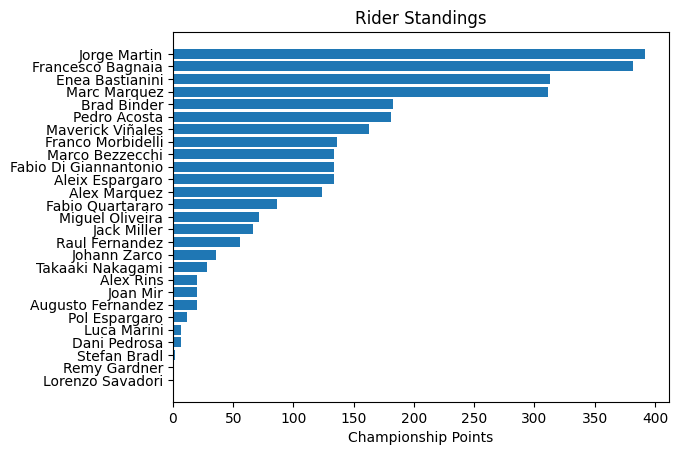

In [32]:
fig, ax = plt.subplots()

ax.barh(df_rider_standings['rider_name'], df_rider_standings['points'])
ax.invert_yaxis()
ax.set_xlabel('Championship Points')
ax.set_title('Rider Standings')

plt.show()

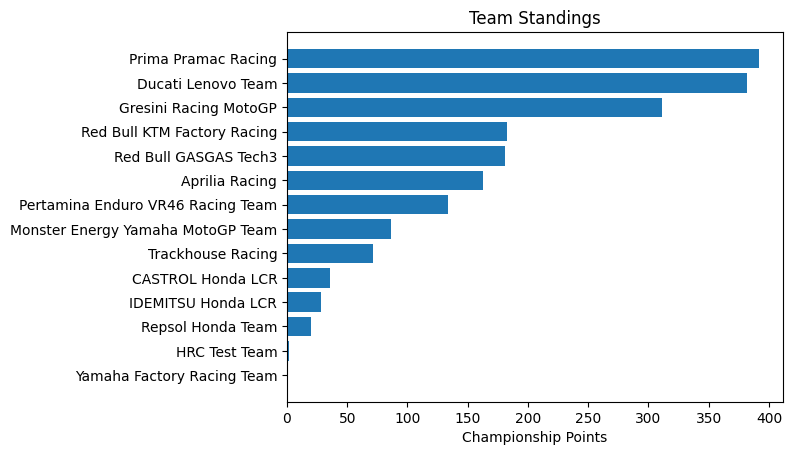

In [33]:
fig, ax = plt.subplots()

ax.barh(df_rider_standings['team_name'], df_rider_standings['points'])
ax.invert_yaxis()
ax.set_xlabel('Championship Points')
ax.set_title('Team Standings')

plt.show()

In [73]:
df_rider_standings['rider_country'].value_counts()

Spain           12
Italy            7
France           2
Australia        2
South Africa     1
Portugal         1
Japan            1
Germany          1
Name: rider_country, dtype: int64

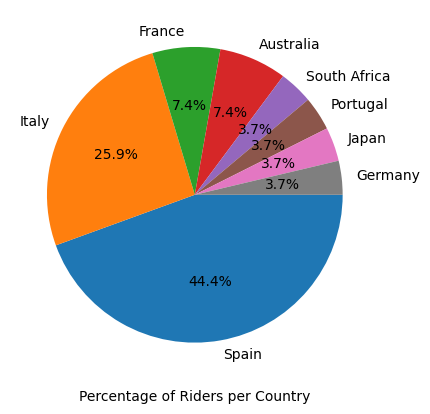

In [88]:
fig, ax = plt.subplots()
labels = df_rider_standings['rider_country'].value_counts().keys()
sizes = df_rider_standings['rider_country'].value_counts().values

ax.pie(sizes, autopct='%1.1f%%', labels=labels)
ax.invert_yaxis()
ax.set_xlabel('Percentage of Riders per Country')

plt.show()